🔹 SIMPLE K-MEANS CLUSTERING (NO FEATURE EXTRACTION)

1️⃣ Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


2️⃣ Load Dataset

In [2]:
df = pd.read_csv("./data/accdata.csv")

# Keep only raw sensor values
X = df[['a', 'b', 'c']]

print(X.head())
print("Shape:", X.shape)


          a         b         c
0 -1.838747  3.543418  9.126697
1  1.110910  1.810017  9.634268
2  8.829816  0.833182  4.663905
3 -0.852336 -0.124498  9.787497
4 -0.900220 -0.095768  9.835381
Shape: (27937, 3)


3️⃣ Feature Scaling (Very Important for K-Means)

In [3]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


4️⃣ Apply K-Means Clustering

In [4]:
NUM_CLUSTERS = 3  # you can try 2, 3, 4, 5

kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['Cluster'] = labels

print(df['Cluster'].value_counts())


Cluster
1    17415
0     5858
2     4664
Name: count, dtype: int64


5️⃣ PCA Visualization (2D)

Since data is 3D, PCA helps visualization.

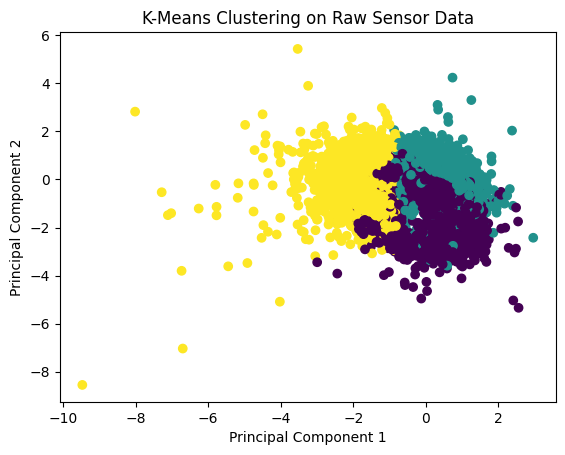

In [9]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure()
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels)
plt.title("K-Means Clustering on Raw Sensor Data")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()


🧠 How to Explain This (Simple Version)

“K-Means clustering was directly applied to normalized raw sensor measurements without feature engineering to explore inherent groupings in the data.”

✅ K-Means PCA Plot with Legend

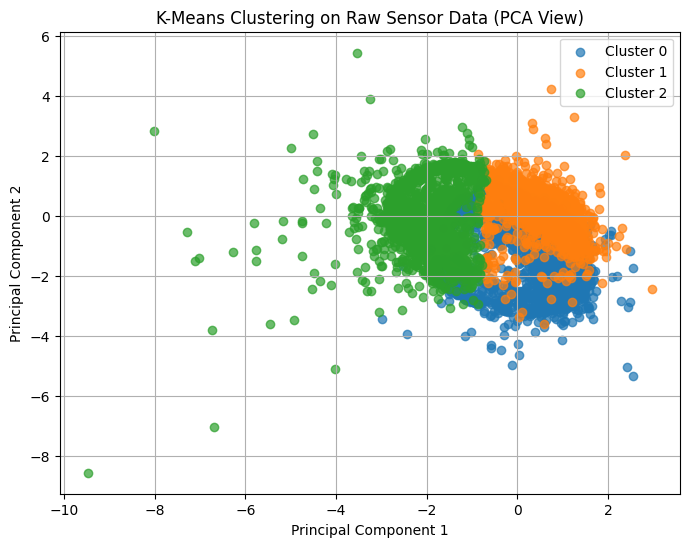

In [6]:
import matplotlib.pyplot as plt
import numpy as np

# PCA projection already computed
# X_pca -> shape (n_samples, 2)
# labels -> cluster labels
# NUM_CLUSTERS -> number of clusters

plt.figure(figsize=(8, 6))

for cluster_id in range(NUM_CLUSTERS):
    plt.scatter(
        X_pca[labels == cluster_id, 0],
        X_pca[labels == cluster_id, 1],
        label=f"Cluster {cluster_id}",
        alpha=0.7
    )

plt.title("K-Means Clustering on Raw Sensor Data (PCA View)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)
plt.show()


🔹 SIMPLE K-MEANS CLUSTERING (NO FEATURE EXTRACTION)


🔹 3D VISUALIZATION USING PLOTLY

1️⃣ Install Plotly (if not installed)	

In [10]:
pip install plotly

   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   -- ------------------------------------- 0.5/9.9 MB 4.2 MB/s eta 0:00:03
   ------- -------------------------------- 1.8/9.9 MB 6.3 MB/s eta 0:00:02
   ------------ --------------------------- 3.1/9.9 MB 6.6 MB/s eta 0:00:02
   ------------------- -------------------- 4.7/9.9 MB 6.5 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.9 MB 6.1 MB/s eta 0:00:01
   ----------------------- ---------------- 5.8/9.9 MB 6.1 MB/s eta 0:00:01
   -------------------------- ------------- 6.6/9.9 MB 4.8 MB/s eta 0:00:01
   --------------------------- ------------ 6.8/9.9 MB 4.6 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.9 MB 4.2 MB/s eta 0:00:01
   ------------------------------- -------- 7.9/9.9 MB 4.0 MB/s eta 0:00:01
   --------------------------------- ------ 8.4/9.9 MB 3.8 MB/s eta 0:00:01
   ------------------------------------ --- 8.9/9.9 MB 3.7 MB/s eta 0:00:01
   ----------------

In [ ]:
# import necessary libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import plotly.express as px


In [ ]:
# Load Dataset

df = pd.read_csv("./data/accdata.csv")

# Use raw sensor values directly
X = df[['a', 'b', 'c']]

print(X.head())
print("Shape:", X.shape)


          a         b         c
0 -1.838747  3.543418  9.126697
1  1.110910  1.810017  9.634268
2  8.829816  0.833182  4.663905
3 -0.852336 -0.124498  9.787497
4 -0.900220 -0.095768  9.835381
Shape: (27937, 3)


In [ ]:
# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [19]:
# Apply K-Means Clustering
NUM_CLUSTERS = 3  # you can try 2, 3, 4, 5

kmeans = KMeans(n_clusters=NUM_CLUSTERS, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)

print(df['Cluster'].value_counts())


Cluster
1    17415
0     5858
2     4664
Name: count, dtype: int64


In [20]:
#3D Visualization with Plotly

fig = px.scatter_3d(
    df,
    x='a',
    y='b',
    z='c',
    color='Cluster',
    title='3D K-Means Clustering on Raw Sensor Data',
    labels={'a': 'Sensor A', 'b': 'Sensor B', 'c': 'Sensor C'}
)

fig.show()
